In [53]:
import utils.file_utils as fu
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
import sys
import yaml

import numpy as np
import seaborn as sns
mpl.rcParams['legend.loc'] = 'upper right'

In [54]:
DUAL_PATH="../../data/florin_cmp.csv"

In [55]:
df=pd.read_csv(open(DUAL_PATH))
df.head(15)

,Unnamed: 0,disc,label,meta_G_GAS,meta_G_SOL,metric_Unnamed: 0,metric_corangles_ankle_l,metric_corangles_ankle_r,metric_corangles_hip_l,metric_corangles_hip_r,metric_corangles_knee_l,metric_corangles_knee_r,metric_energy,metric_maximize_distance,metric_maxtime,metric_minimize_activation,metric_minimize_passive_torques,metric_minimize_periodic_gait,metric_velocity
0,0,False,1,1.205,3.076,0,-0.212745,0.374007,0.689552,0.892663,0.529605,0.158562,0.646709,10.205904,1639.0,363.843997,58592.357231,231.857094,1.249835
1,1,False,2,1.205,2.412,0,-0.307187,0.374007,0.587697,0.934542,0.668031,0.428348,0.646709,21.626849,3289.0,174.390033,22930.776401,36.314824,1.317317
2,2,False,3,2.718,2.812,0,0.060457,0.505428,0.510349,0.939766,0.536232,0.158562,0.646709,14.686331,2507.0,246.733341,316626.412832,33.252950,1.174356
3,3,False,4,0.974,3.340,0,-0.161940,0.062541,0.582209,0.922080,0.529605,0.185705,0.646709,12.354151,1835.0,317.582267,75351.798036,80.802173,1.349880
4,4,False,5,1.051,4.000,0,-0.161940,0.088086,0.661155,0.922080,0.518077,0.427178,0.646709,15.465359,2947.0,204.933160,36347.169607,34.721743,1.052342
5,5,True,6,1.872,3.340,0,-0.037774,0.089976,0.708313,0.907205,0.518116,0.472987,0.646709,25.583282,4000.0,155.598558,18108.669150,6.028265,1.280987
6,6,False,7,2.859,3.736,0,0.050526,0.374007,0.431678,0.925903,0.349937,0.278170,0.646709,12.824461,2369.0,258.401449,53414.893645,32.128476,1.085693
7,7,False,8,1.128,0.268,0,0.380654,0.401470,0.689552,0.922080,0.254740,0.799508,0.646709,9.054656,2115.0,254.345431,31251.800089,82.822976,0.859395
8,8,True,9,1.872,0.000,0,0.192050,0.263039,0.898540,0.922080,0.516494,0.403573,0.646709,18.745224,4000.0,153.217310,8393.645515,30.438824,0.939102
9,9,False,10,1.436,2.144,0,-0.225591,0.043124,0.761912,0.918459,0.746931,0.503754,0.646709,22.877293,3347.0,176.205150,24867.508256,32.551322,1.369207


In [16]:
df.metric_corangles_knee_l.max()

0.9822267857172052

In [20]:
 cmap=sns.choose_cubehelix_palette(as_cmap=True)

interactive(children=(IntSlider(value=9, description='n_colors', max=16, min=2), FloatSlider(value=0.0, descri…

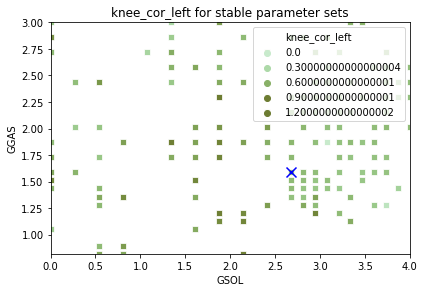

In [61]:
meta_1="meta_G_SOL"
meta_2="meta_G_GAS"
met="metric_corangles_knee_l"

short_met="knee_cor_left"
pd.options.mode.chained_assignment = None  # default='warn'
df["time"]=df.metric_maxtime/200.0
cmap = sns.cubehelix_palette(dark=0.4, light=.85, gamma=0.9,rot=.3,start=1.2,\
                        n_colors=2,hue=1.,as_cmap=True,reverse=False)
df[short_met]=df[met]
g=df[df.disc]
#g=df

r=sns.scatterplot(x=meta_1,y=meta_2,hue=short_met,data=g,palette=cmap,legend='brief',**{'marker':'s'})


refx=2.6824131059368534
refy=1.5891605194328091155

plt.scatter(refx, refy, marker='x', s=100,color="b",label="ref")

#g=df[df['metric_maxtime']>=4000]
#
#sns.kdeplot(g[meta_1],g[meta_2],color='b',shade=True,shade_lowest=False,alpha=0.3)
plt.xlim((df[meta_1].min(),df[meta_1].max()))
plt.ylim((df[meta_2].min(),df[meta_2].max()))

plt.xlabel("GSOL")
plt.ylabel("GGAS")
plt.tight_layout()
plt.title(short_met+" for stable parameter sets")
plt.savefig(short_met+"_florin.png",dpi=300)

In [51]:
eps=0.1
r1=df[df[meta_1]>refx-eps]
r2=r1[r1[meta_1]<refx+eps]
r3=r2[r2[meta_2]<refy+eps]
r4=r3[r3[meta_2]>refy-eps]
erf=r4.head(1)

In [52]:
erf.metric_corangles_hip_r

119   -0.905774
Name: metric_corangles_hip_r, dtype: float64